# <center> 3.2 - –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è. –û—à–∏–±–∫–∏ –º–æ–¥–µ–ª–∏</center> 

–í –ø—Ä–µ–¥—ã–¥—É—â–µ–º —É—Ä–æ–∫–µ –ø—Ä–æ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é –º—ã —Å–º–æ—Ç—Ä–µ–ª–∏, —á—Ç–æ –º–æ–∂–Ω–æ –ø–æ—á–µ—Ä–ø–Ω—É—Ç—å –∏–∑ –≤–∏–∑—É–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö: –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, –ø—Ä–æ–ø—É—Å–∫–∏, –∏–¥–µ–∏ –¥–ª—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –¢–µ–ø–µ—Ä—å –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–∂–µ—Ç –Ω–∞–º –ø–æ–º–æ—á—å –ø–æ—Å–ª–µ —Ç–æ–≥–æ, –∫–∞–∫ –º—ã —É–∂–µ –æ–±—É—á–∏–ª–∏ –∫–∞–∫—É—é-–Ω–∏–±—É–¥—å –º–æ–¥–µ–ª—å: –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ—à–∏–±–∫–∏ –º–æ–¥–µ–ª–∏, –æ—Ç—Å–µ—è—Ç—å –ª–∏—à–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –∫–∞–∫ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å —Ç–æ—á–Ω–æ—Å—Ç—å –≤ –ø–æ—Å–ª–µ–¥—É—é—â–∏—Ö —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞—Ö.

In [1]:
!pip install catboost sklearn shap seaborn -q

In [2]:
import pandas as pd
import numpy as np

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

import seaborn as sns; sns.set_theme()

In [3]:
train = pd.read_csv('../data/car_train.csv')   # car_info - –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø—Ä–æ –º–∞—à–∏–Ω—ã —Å —Ç–∞—Ä–≥–µ—Ç–æ–º
rides = pd.read_csv('../data/rides_info.csv') # rides_info - –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø—Ä–æ –ø–æ–µ–∑–¥–∫–∏

In [4]:
f = lambda x: x.nunique()
rides_df_gr = rides.groupby('car_id', as_index=False).agg(mean_rating = ('speed_avg', 'mean'),
                                                   distance_sum = ('distance', 'sum'),
                                                   rating_min = ('rating', 'min'),
                                                   speed_max = ('speed_max', 'max'),
                                                   user_ride_quality_median = ('user_ride_quality', 'median'), 
                                                   deviation_normal_count = ('deviation_normal', 'count'),
                                                   user_uniq = ('user_id', f))


rides_df_gr.head(2)
def add_featues(df):
    
    if 'mean_rating' not in df.columns:
        return df.merge(rides_df_gr, on = 'car_id', how = 'left')
    
    return df
    
    
train = add_featues(train)

In [5]:
drop_cols = ['user_id', 'car_id', 'ride_id', 'ride_date']
cat_cols = ['car_type', 'fuel_type', 'model']

In [6]:
# –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ–¥–∏–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –ø–æ —Å—Ç–æ–ª–±—Ü—É
train.fillna(train.median(), inplace=True)

## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

In [7]:
X = train.drop(drop_cols + ['target_reg','target_class'], axis=1, errors = 'ignore')
y = train['target_class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
clf = CatBoostClassifier(random_seed=9,
                        thread_count=-1,
                        use_best_model=True,
                        cat_features=cat_cols,
                        colsample_bylevel =  0.1,
                        subsample = 0.95,
                        bootstrap_type='Bernoulli',
                         )

In [10]:
clf.fit( X_train, y_train,
        eval_set=(X_test, y_test),
        verbose=50, plot=False, early_stopping_rounds=200)

print(clf.get_best_score())

Learning rate set to 0.109335
0:	learn: 2.0246838	test: 2.0257201	best: 2.0257201 (0)	total: 99.5ms	remaining: 1m 39s
50:	learn: 0.9732573	test: 1.0333384	best: 1.0333384 (50)	total: 255ms	remaining: 4.74s
100:	learn: 0.6918503	test: 0.7951926	best: 0.7951926 (100)	total: 360ms	remaining: 3.2s
150:	learn: 0.5937098	test: 0.7287818	best: 0.7287818 (150)	total: 477ms	remaining: 2.68s
200:	learn: 0.5279399	test: 0.6975797	best: 0.6975761 (199)	total: 588ms	remaining: 2.34s
250:	learn: 0.4962953	test: 0.6808884	best: 0.6808515 (243)	total: 720ms	remaining: 2.15s
300:	learn: 0.4525821	test: 0.6642880	best: 0.6642880 (300)	total: 915ms	remaining: 2.12s
350:	learn: 0.4285859	test: 0.6631553	best: 0.6616134 (313)	total: 1.05s	remaining: 1.94s
400:	learn: 0.4065998	test: 0.6597884	best: 0.6596319 (399)	total: 1.13s	remaining: 1.68s
450:	learn: 0.3802530	test: 0.6560621	best: 0.6558365 (438)	total: 1.25s	remaining: 1.52s
500:	learn: 0.3609973	test: 0.6563902	best: 0.6539781 (482)	total: 1.36s	re

In [11]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
fi = clf.get_feature_importance(prettified=True)
fi[:30]

Feature Id  Importances
0                mean_rating    34.625416
1                  speed_max    32.962968
2                 rating_min    11.380169
3                  user_uniq     4.521437
4                      model     3.113355
5                   car_type     2.751093
6   user_ride_quality_median     2.281669
7               year_to_work     1.752869
8               distance_sum     1.674668
9              year_to_start     1.594838
10                car_rating     1.592898
11                    riders     1.590242
12                 fuel_type     0.158376
13    deviation_normal_count     0.000000

## –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –≤–∞–∂–Ω–æ—Å—Ç—å —Ñ–∏—á–µ–π –º–æ–¥–µ–ª–∏ –∏–∑ `Catboost`

–ù–µ —Å—Ç–æ–∏—Ç —Å–∏–ª—å–Ω–æ –¥–æ–≤–µ—Ä—è—Ç—å —ç—Ç–æ–º—É —Ä–µ–π—Ç–∏–Ω–≥—É –≤–∞–∂–Ω–æ—Å—Ç–∏, —Ç.–∫. –¥–ª—è —Å–∏–ª—å–Ω–æ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–º–ø–æ—Ä—Ç–∞–Ω—Å –¥–µ–ª–∏—Ç—Å—è –ø–æ–ø–æ–ª–∞–º –∏ –æ–Ω–∏ –æ–±–∞ –º–æ–≥—É—Ç —É–ª–µ—Ç–µ—Ç—å –≤–Ω–∏–∑ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏.

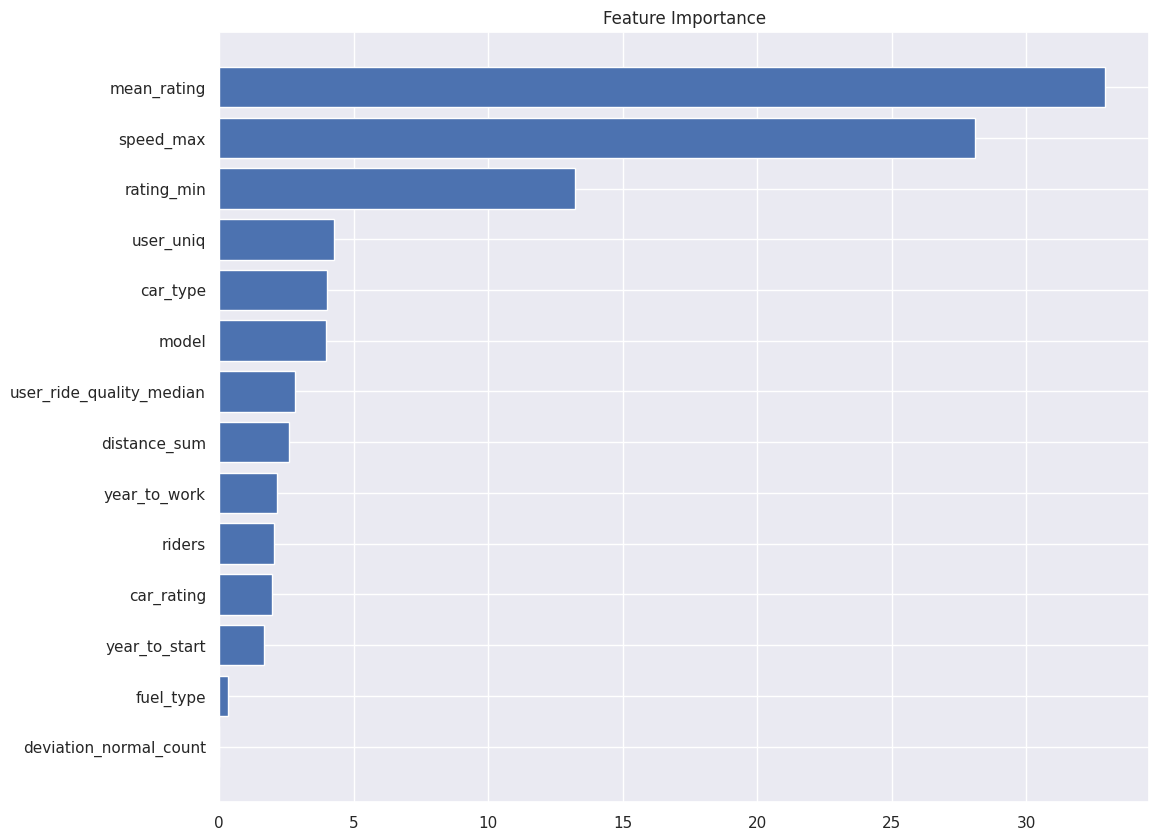

In [13]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

## –¢–µ–ø–µ—Ä—å –ø–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø—Ä–∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ —Å –ø–æ–º–æ—â—å—é SeaBorn

In [ ]:
from sklearn.model_selection import KFold

n_splits = 5
targets = ['target_class']
clfs = []
scores = []
kf = KFold(n_splits=n_splits, shuffle=True, random_state=7575)
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    train_dataset = Pool(data=X_train, label=y_train, cat_features=cat_cols)
    eval_dataset = Pool(data=X_test, label=y_test, cat_features=cat_cols)

    print(X_train.shape, y_train.shape)
    clf = CatBoostClassifier(random_seed=9,
                        thread_count=-1,
                        use_best_model=True,
                        cat_features=cat_cols,
                        colsample_bylevel =  0.1,
                        subsample = 0.95,
                        bootstrap_type='Bernoulli',)

    clfs.append(clf)

    clf.fit(train_dataset, eval_set=eval_dataset,
            verbose = 500, use_best_model = True, plot = False)

    scores.append(np.mean([v for k, v in clf.best_score_['validation'].items()], dtype = 'float16'))
print('mean Recalls core --------->', np.mean(scores, dtype = 'float16'), np.std(scores, dtype = 'float16'))

(1869, 14) (1869,)
Learning rate set to 0.109335
0:	learn: 2.0243175	test: 2.0386745	best: 2.0386745 (0)	total: 2.17ms	remaining: 2.17s
500:	learn: 0.3944607	test: 0.6274056	best: 0.6252815 (440)	total: 716ms	remaining: 714ms
999:	learn: 0.2541675	test: 0.6343946	best: 0.6252815 (440)	total: 1.45s	remaining: 0us

bestTest = 0.6252814875
bestIteration = 440

Shrink model to first 441 iterations.
(1869, 14) (1869,)
Learning rate set to 0.109335
0:	learn: 2.0308156	test: 2.0346682	best: 2.0346682 (0)	total: 2.07ms	remaining: 2.07s
500:	learn: 0.3593367	test: 0.6460661	best: 0.6437758 (427)	total: 721ms	remaining: 718ms
999:	learn: 0.2102118	test: 0.6690695	best: 0.6437758 (427)	total: 1.49s	remaining: 0us

bestTest = 0.6437758012
bestIteration = 427

Shrink model to first 428 iterations.
(1870, 14) (1870,)
Learning rate set to 0.109336
0:	learn: 2.1825869	test: 2.1821489	best: 2.1821489 (0)	total: 877us	remaining: 877ms
500:	learn: 0.3599905	test: 0.5944812	best: 0.5939004 (497)	total: 78

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è —Ä–∞–∑–±—Ä–æ—Å–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ —Ñ–æ–ª–¥–∞–º.

–í—Å–µ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 14 –£—Å—Ä–µ–¥–Ω–µ–µ –ø–æ 5-—Ç–∏ –º–æ–¥–µ–ª—è–º: 
–ù–∞ –≥—Ä–∞—Ñ–∏–∫ –Ω–∞–Ω–µ—Å–µ–Ω–æ —Ç–æ–ø-14 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤


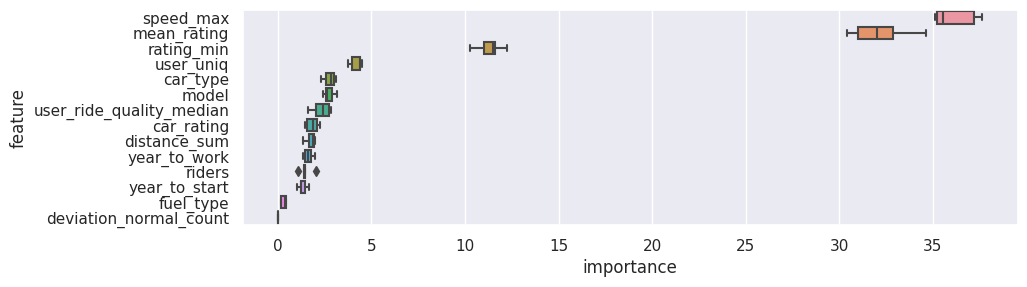

In [88]:
def plot_importance(df, best_model, height, top_n=50):
    
    fi = pd.DataFrame(index = df.columns, columns = [])
    for i, m in enumerate(best_model):
        fi[f'm_{i}'] = m.get_feature_importance()

    fi = fi.stack().reset_index().iloc[:,[0, 2]]#.to_frame()
    fi.columns = ['feature','importance']

    cols_ord = list(fi.groupby('feature')['importance'].mean().sort_values(ascending=False).index)
    print('–í—Å–µ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤', len(cols_ord), '–£—Å—Ä–µ–¥–Ω–µ–µ –ø–æ {}-—Ç–∏ –º–æ–¥–µ–ª—è–º: '.format(len(best_model)) )
    cols_ord = cols_ord[:top_n]
    
    fi = fi[fi['feature'].isin(cols_ord)]
    
    plt.figure(figsize=(10, len(cols_ord)*height))
    b = sns.boxplot(data=fi, y='feature', x='importance', orient='h', order=cols_ord)
    
    print('–ù–∞ –≥—Ä–∞—Ñ–∏–∫ –Ω–∞–Ω–µ—Å–µ–Ω–æ —Ç–æ–ø-{} –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'.format(top_n))
    return fi.groupby(by =['feature'], as_index=False)['importance'].mean().sort_values(by='importance', ascending=False)

df_feats_imp = plot_importance(X, clfs, height = 0.20, top_n = 14)


## –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤

## <center><b> Permutation importance </b></center> 

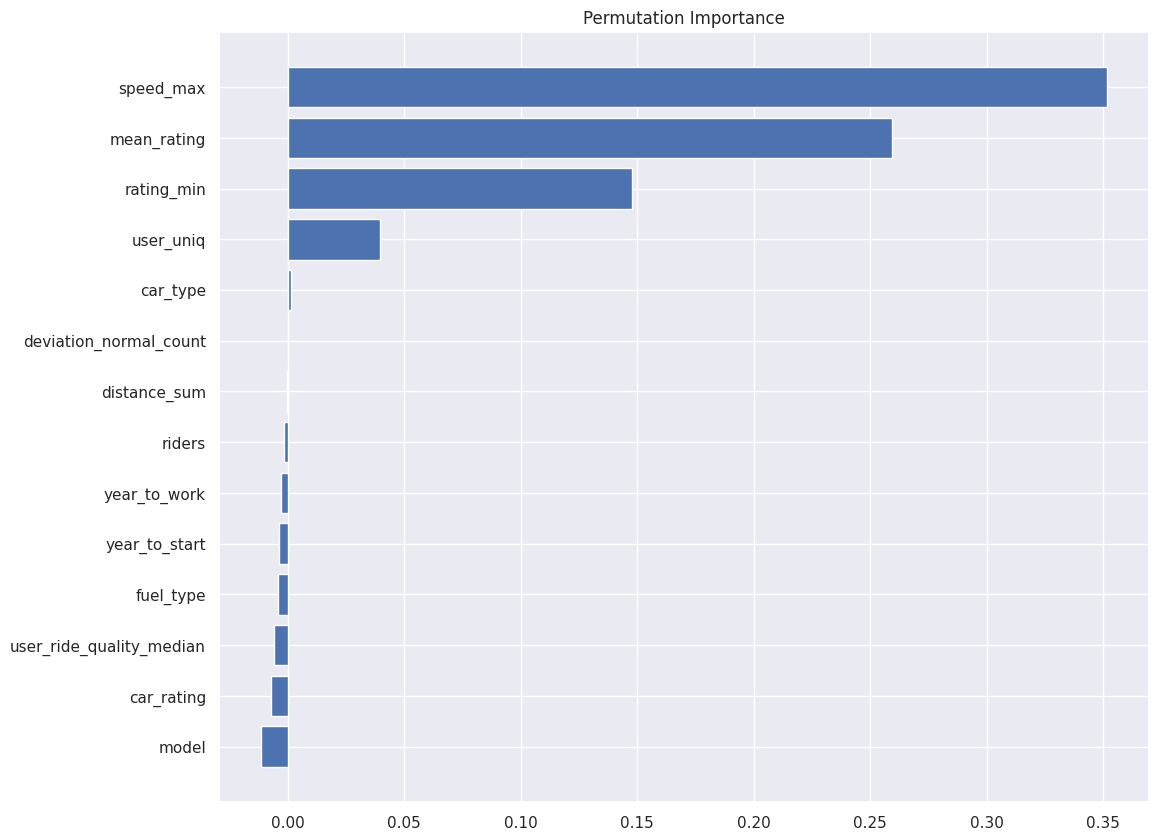

In [97]:
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance');

## <center><b> SHAP values </b></center> 

<img src="https://shap.readthedocs.io/en/latest/_images/shap_header.png">

–í –±–∏–±–ª–∏–æ—Ç–µ–∫–µ SHAP –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è –®—ç–ø–ª–∏ (–ø–æ –∏–º–µ–Ω–∏ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–≥–æ –º–∞—Ç–µ–º–∞—Ç–∏–∫–∞ –∏ –Ω–∞–∑–≤–∞–Ω–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫–∞), –æ–Ω–∞ –æ–±–ª–∞–¥–∞–µ—Ç –±–æ–≥–∞—Ç—ã–º —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–æ–º –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–º–æ–≥–∞–µ—Ç –ª–µ–≥–∫–æ –∏ –ø—Ä–æ—Å—Ç–æ –æ–±—ä—è—Å–Ω–∏—Ç—å –º–æ–¥–µ–ª—å.

–î–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ —Ñ–∏—á–∏ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –æ—Ü–µ–Ω–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–æ–¥–µ–ª–∏ —Å –∏ –±–µ–∑ –¥–∞–Ω–Ω–æ–π —Ñ–∏—á–∏.

In [19]:
# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ shap –±—ã–≤–∞–µ—Ç –∫–∞–ø—Ä–∏–∑–Ω–∞ –≤ —É—Å—Ç–∞–Ω–æ–≤–∫–µ –∏ –º–æ–∂–µ—Ç –∫–æ–Ω—Ñ–ª–∏–∫—Ç–æ–≤–∞—Ç—å —Å –¥—Ä—É–≥–∏–º–∏ –ø–∞–∫–µ—Ç–∞–º–∏
# –ò–Ω–æ–≥–¥–∞ –ø–æ–º–æ–≥–∞–µ—Ç —Ç–∞–∫–æ–π –Ω–∞–±–æ—Ä –∫–æ–º–∞–Ω–¥
#!pip uninstall opencv-python -y -q
#!pip install opencv-python shap -q

In [13]:
import shap
shap.initjs()

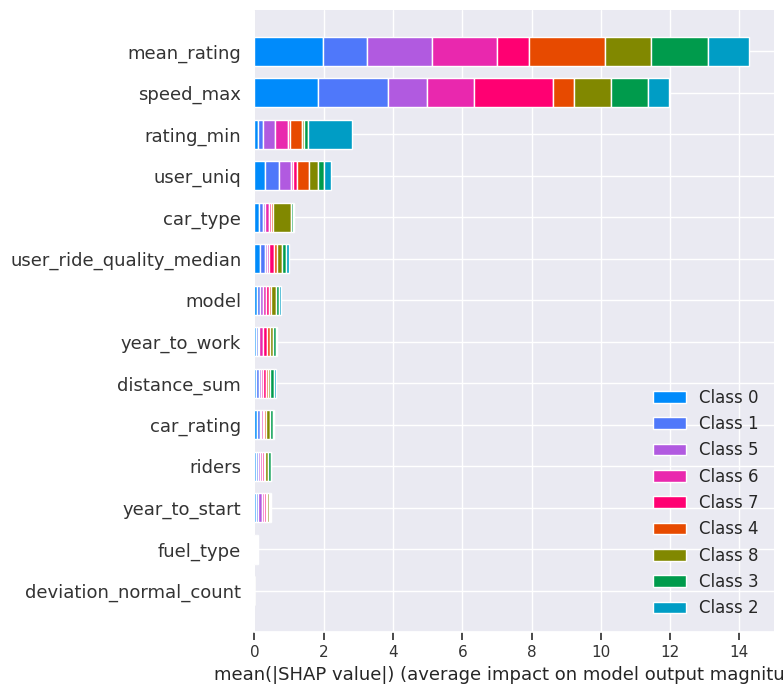

In [14]:
# –ú–æ–∂–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤–ª–∏—è–Ω–∏–µ —Ñ–∏—á–µ–π –Ω–∞ –≤—Å–µ –∫–ª–∞—Å—Å—ã
explainer = shap.TreeExplainer(clf)

val_dataset = Pool(data=X_test, label=y_test, cat_features=cat_cols)
shap_values = explainer.shap_values(val_dataset)
shap.summary_plot(shap_values, X_test, max_display = 25)

Class 0


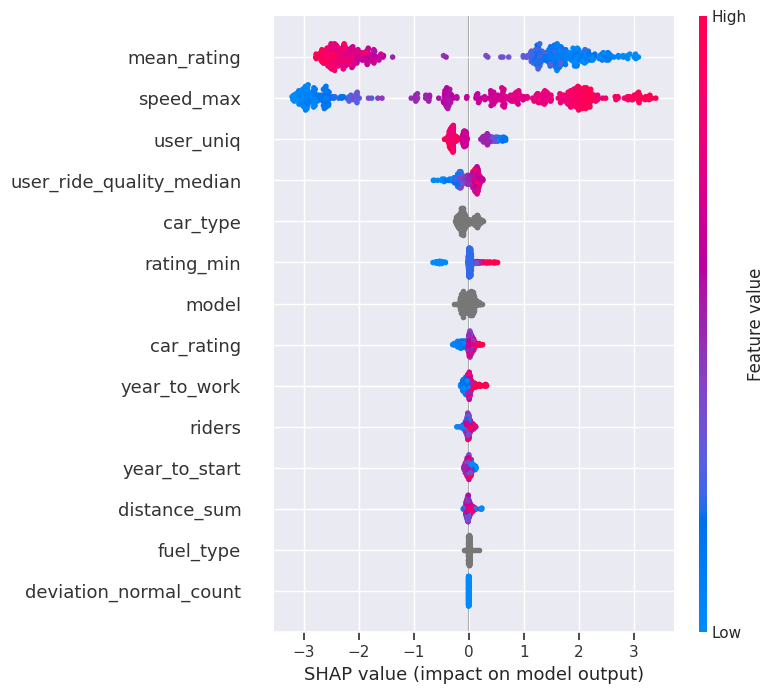

Class 1


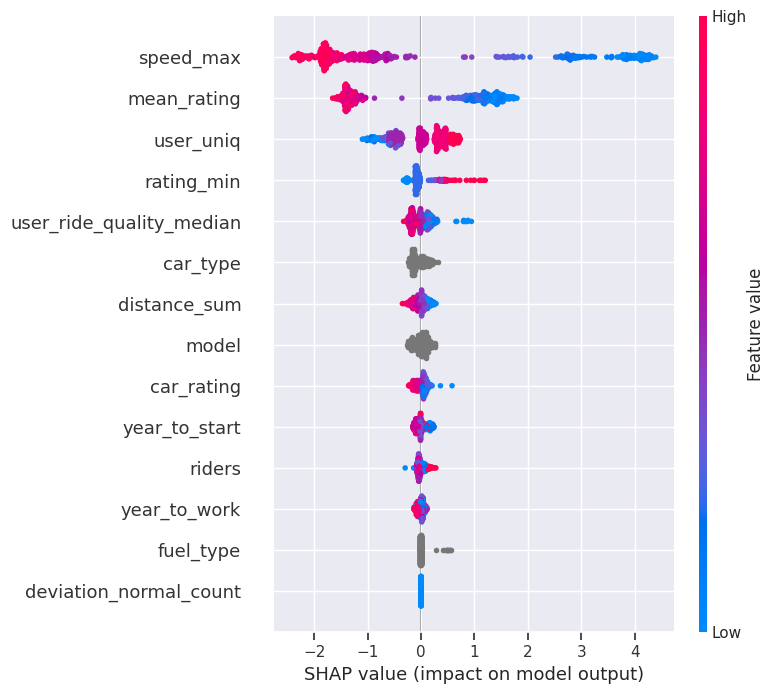

In [15]:
# –ò–ª–∏ –Ω–∞ –∫–∞–∂–¥—ã–π –∫–ª–∞—Å—Å –ø–æ –æ—Ç–¥–µ–ª—å–Ω–æ—Å—Ç–∏
for i in range(len(np.unique(y.values))):
    print(f'Class {i}')
    shap.summary_plot(shap_values[i], X_test, color_bar=True)
    if i == 1:
        break
#shap.summary_plot(shap_values[1], X_test, color_bar=False)

–ö–∞–∫ —á–∏—Ç–∞—Ç—å –≥—Ä–∞—Ñ–∏–∫:
* –∑–Ω–∞—á–µ–Ω–∏—è —Å–ª–µ–≤–∞ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–π –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–æ–π –ª–∏–Ω–∏–∏ ‚Äî —ç—Ç–æ negative –∫–ª–∞—Å—Å (0), —Å–ø—Ä–∞–≤–∞ ‚Äî positive (1)
* —á–µ–º —Ç–æ–ª—â–µ –ª–∏–Ω–∏—è –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ, —Ç–µ–º –±–æ–ª—å—à–µ —Ç–∞–∫–∏—Ö —Ç–æ—á–µ–∫ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è
* —á–µ–º –∫—Ä–∞—Å–Ω–µ–µ —Ç–æ—á–∫–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ, —Ç–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ñ–∏—á–∏ –≤ –Ω–µ–π

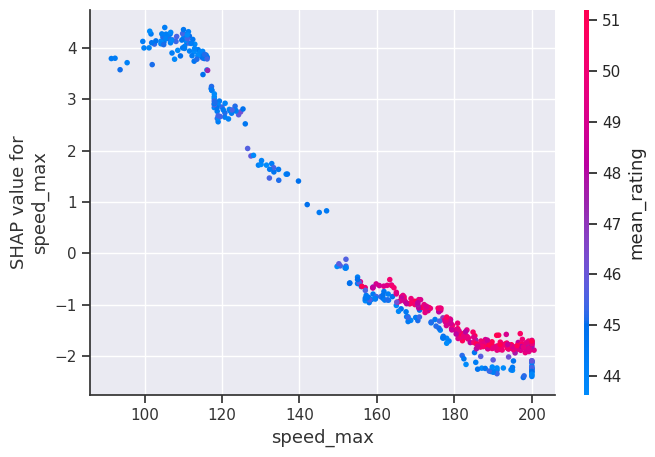

In [14]:
# —Ç–∞–∫ –∂–µ –º–æ–∂–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤–ª–∏—è–Ω–∏–µ –æ—Ç–¥–µ–ª—å–Ω–æ–π —Ñ–∏—á–∏ –Ω–∞ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–π –∫–ª–∞—Å—Å —Å –ø–æ–º–æ—â—å—é dependence_plot 
shap.dependence_plot("speed_max", shap_values[1], X_test)

–û–¥–Ω–∞ –∏–∑ —Å–∞–º—ã—Ö –∫—Ä—É—Ç—ã—Ö —Ñ–∏—à–µ–∫ –±–∞–±–ª–∏–æ—Ç–µ–∫–∏ SHAP, —ç—Ç–æ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–∞–∫ –º–æ–¥–µ–ª—å –æ–ø—Ä–¥–µ–ª—è–µ—Ç –∫ –∫–∞–∫–æ–º—É –∫–ª–∞—Å—Å—É –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–∞—è –º–∞—à–∏–Ω–∞, –∏ –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ —ç—Ç–æ –≤–ª–∏—è—é—Ç.
–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ –ø–µ—Ä–≤–æ–π –º–∞—à–∏–Ω—ã –∏–∑ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏.

In [55]:
X_test.iloc[0]

model                       Volkswagen ID.4 
car_type                             premium
fuel_type                            electro
car_rating                              4.28
year_to_start                           2017
riders                                114851
year_to_work                            2020
mean_rating                        51.402299
distance_sum                 11634739.066409
rating_min                               0.1
speed_max                         190.915943
user_ride_quality_median           -4.022916
deviation_normal_count                   174
user_uniq                                148
Name: 1720, dtype: object

In [57]:
# –ø–æ–ª–æ–º–∫–∞ "engine_fuel" —ç—Ç–æ 4 –∫–ª–∞—Å—Å
y_test.iloc[0]

'engine_fuel'

–í —ç—Ç–æ–º –Ω–∞–º –ø–æ–º–æ–≥—É—Ç `force_plot` –∏ –ø—Ä–æ—Å—Ç–æ "–ø—É—à–µ—á–Ω—ã–π" –≤–∏–¥ –≥—Ä–∞—Ñ–∏–∫–∞ `waterfall_plot`.
–ú–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –≤–∫–ª–∞–¥ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ —Ç–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ –æ—Ç–Ω–µ—Å–ª–∞ –ø–æ–ª–æ–º–∫—É –º–∞—à–∏–Ω—ã –∫ –∫–ª–∞—Å—Å—É 0 –∏ –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É 4

In [16]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0], feature_names=X_test.columns)

In [17]:
shap.force_plot(explainer.expected_value[0], shap_values[4][0], feature_names=X_test.columns)

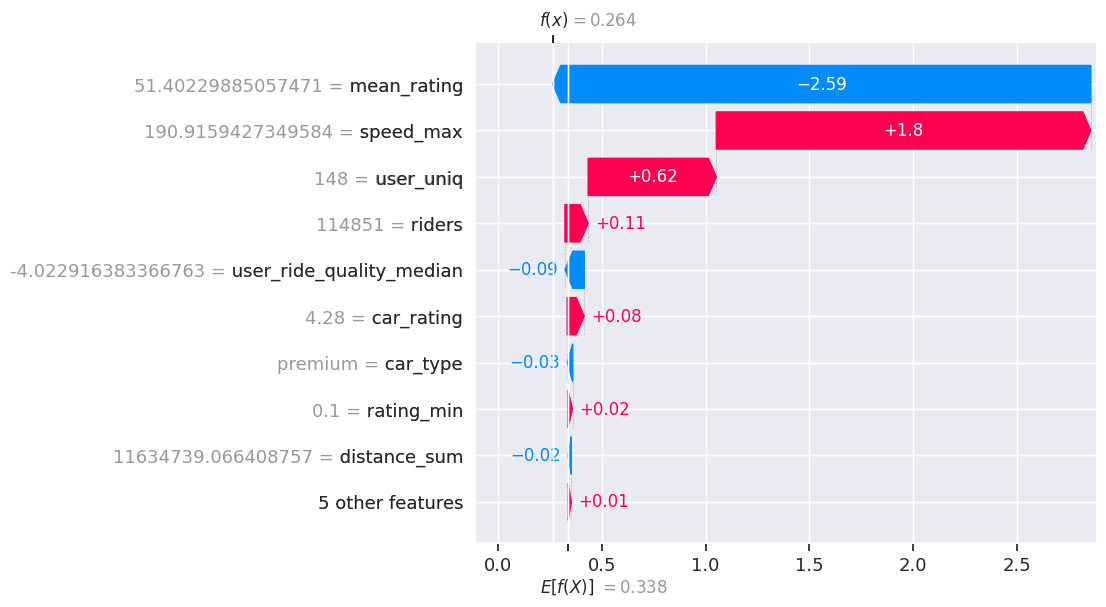

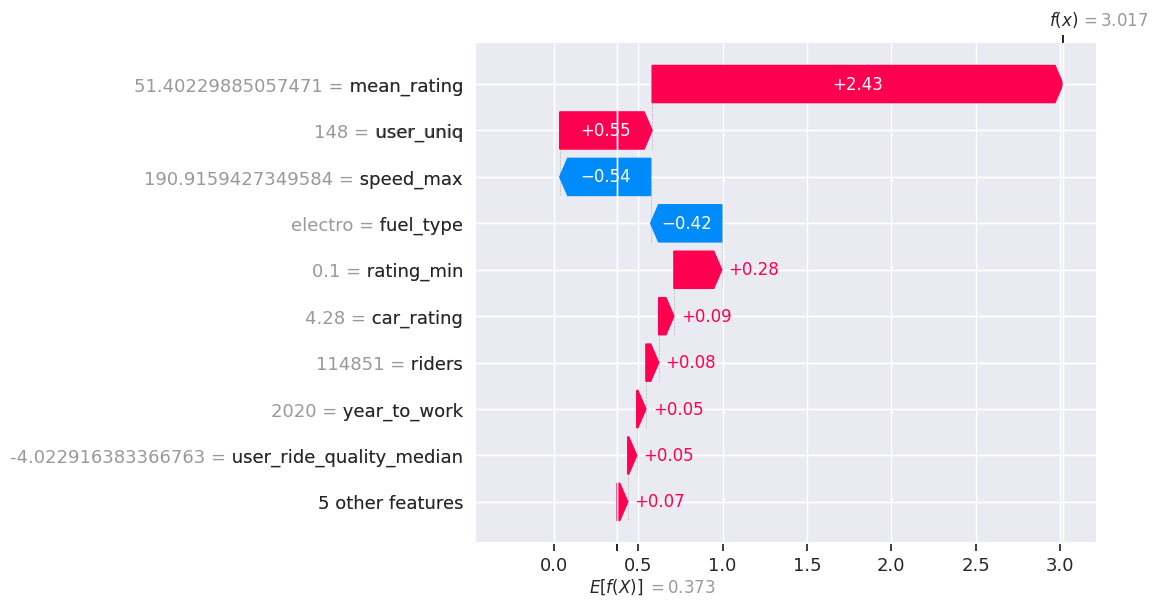

In [18]:
# waterfall_plot –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —á–∏—Å–ª–µ–Ω–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
s_values = explainer(X_test)
shap.waterfall_plot(s_values[0][:, 0])

shap.waterfall_plot(s_values[0][:, 4])

–í –±–∏–±–ª–∏–æ—Ç–µ–∫–µ [SHAP](https://shap.readthedocs.io/en/latest/index.html) –µ—Å—Ç—å –µ—â—ë –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—Ä—É–≥–∏—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤, –∞ –º—ã –ø–æ–∫–∞–∑–∞–ª–∏ —Å–∞–º—ã–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –∏ —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ.

# <center> classification report </center>

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test, y_pred = y_pred, target_names=clf.classes_))

                 precision    recall  f1-score   support

    another_bug       0.94      0.86      0.90        58
      break_bug       0.63      0.55      0.59        56
    electro_bug       1.00      1.00      1.00        51
   engine_check       0.74      0.88      0.80        49
    engine_fuel       0.78      0.67      0.72        58
engine_ignition       0.67      0.50      0.57        58
engine_overheat       0.49      0.73      0.58        48
     gear_stick       0.57      0.59      0.58        51
    wheel_shake       0.67      0.67      0.67        39

       accuracy                           0.71       468
      macro avg       0.72      0.72      0.71       468
   weighted avg       0.73      0.71      0.71       468



## <center> –ú–∞—Ç—Ä–∏—Ü–∞ —Å–º–µ–∂–Ω–æ—Å—Ç–∏ </center>

–ü–æ—Å–º–æ—Ç—Ä–∏–º –≤ –∫–∞–∫–∏—Ö –∫–ª–∞—Å—Å–∞—Ö –º–æ–¥–µ–ª—å –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –æ—à–∏–±–∞–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é –º–∞—Ç—Ä–∏—Ü—ã —Å–º–µ–∂–Ω–æ—Å—Ç–∏

In [ ]:
# import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, xticks_rotation = 45)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation = 45)

# plt.show()

In [ ]:
plt.rcParams['figure.figsize']=(12,12)
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)

In [29]:
from ..src.utils import *

ImportError: attempted relative import with no known parent package

In [27]:
plot_confusion(Y_test = y_test, Y_test_pred = y_pred)#, labels = clf.classes_ )

NameError: name 'plot_confusion' is not defined

–ó–Ω–∞—á–µ–Ω–∏—è –¥–∏–∞–≥–æ–Ω–∞–ª–∏ —Å–≤–µ—Ä—Ö—É –≤–Ω–∏–∑ —Å–ª–µ–≤–∞ –Ω–∞–ø—Ä–∞–≤–æ ‚Äì —ç—Ç–æ —á–∏—Å–ª–æ –≤–µ—Ä–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π. –ß–µ–º —Ç–µ–º–Ω–µ–µ –∫–≤–∞–¥—Ä–∞—Ç, —Ç–µ–º –±–æ–ª—å—à–µ –≤–µ—Ä–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤.

In [ ]:
# cm = confusion_matrix(y_test, pred, labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=clf.classes_)
# disp.plot()

–ú–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –º–æ–¥–µ–ª—å –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø—É—Ç–∞–µ—Ç—Å—è –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏: 1 - 2, 1 - 5, 1- 6, 2 - 3, 5 - 6. –í —Ü–µ–ª–æ–º, –≤–∏–¥–Ω–æ, —á—Ç–æ 1 –∏ 5 –∫–ª–∞—Å—Å—ã —Ö—É–∂–µ –æ—Ç–¥–µ–ª—è—é—Ç—Å—è.

## –û—Ç—Ä–∏—Å—É–µ–º –¥–µ—Ä–µ–≤–æ –º–æ–¥–µ–ª–∏

In [ ]:
clf.plot_tree(
    tree_idx=0,
    pool=val_dataset
)

## <center> Partial plots </center>

 –ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —Ç–æ–ø–æ–≤—ã–µ —Ñ–∏—á–∏ –≤–ª–∏—è—é—Ç –Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑ –º–æ–¥–µ–ª–∏

In [22]:
len(np.unique(y.values))

9

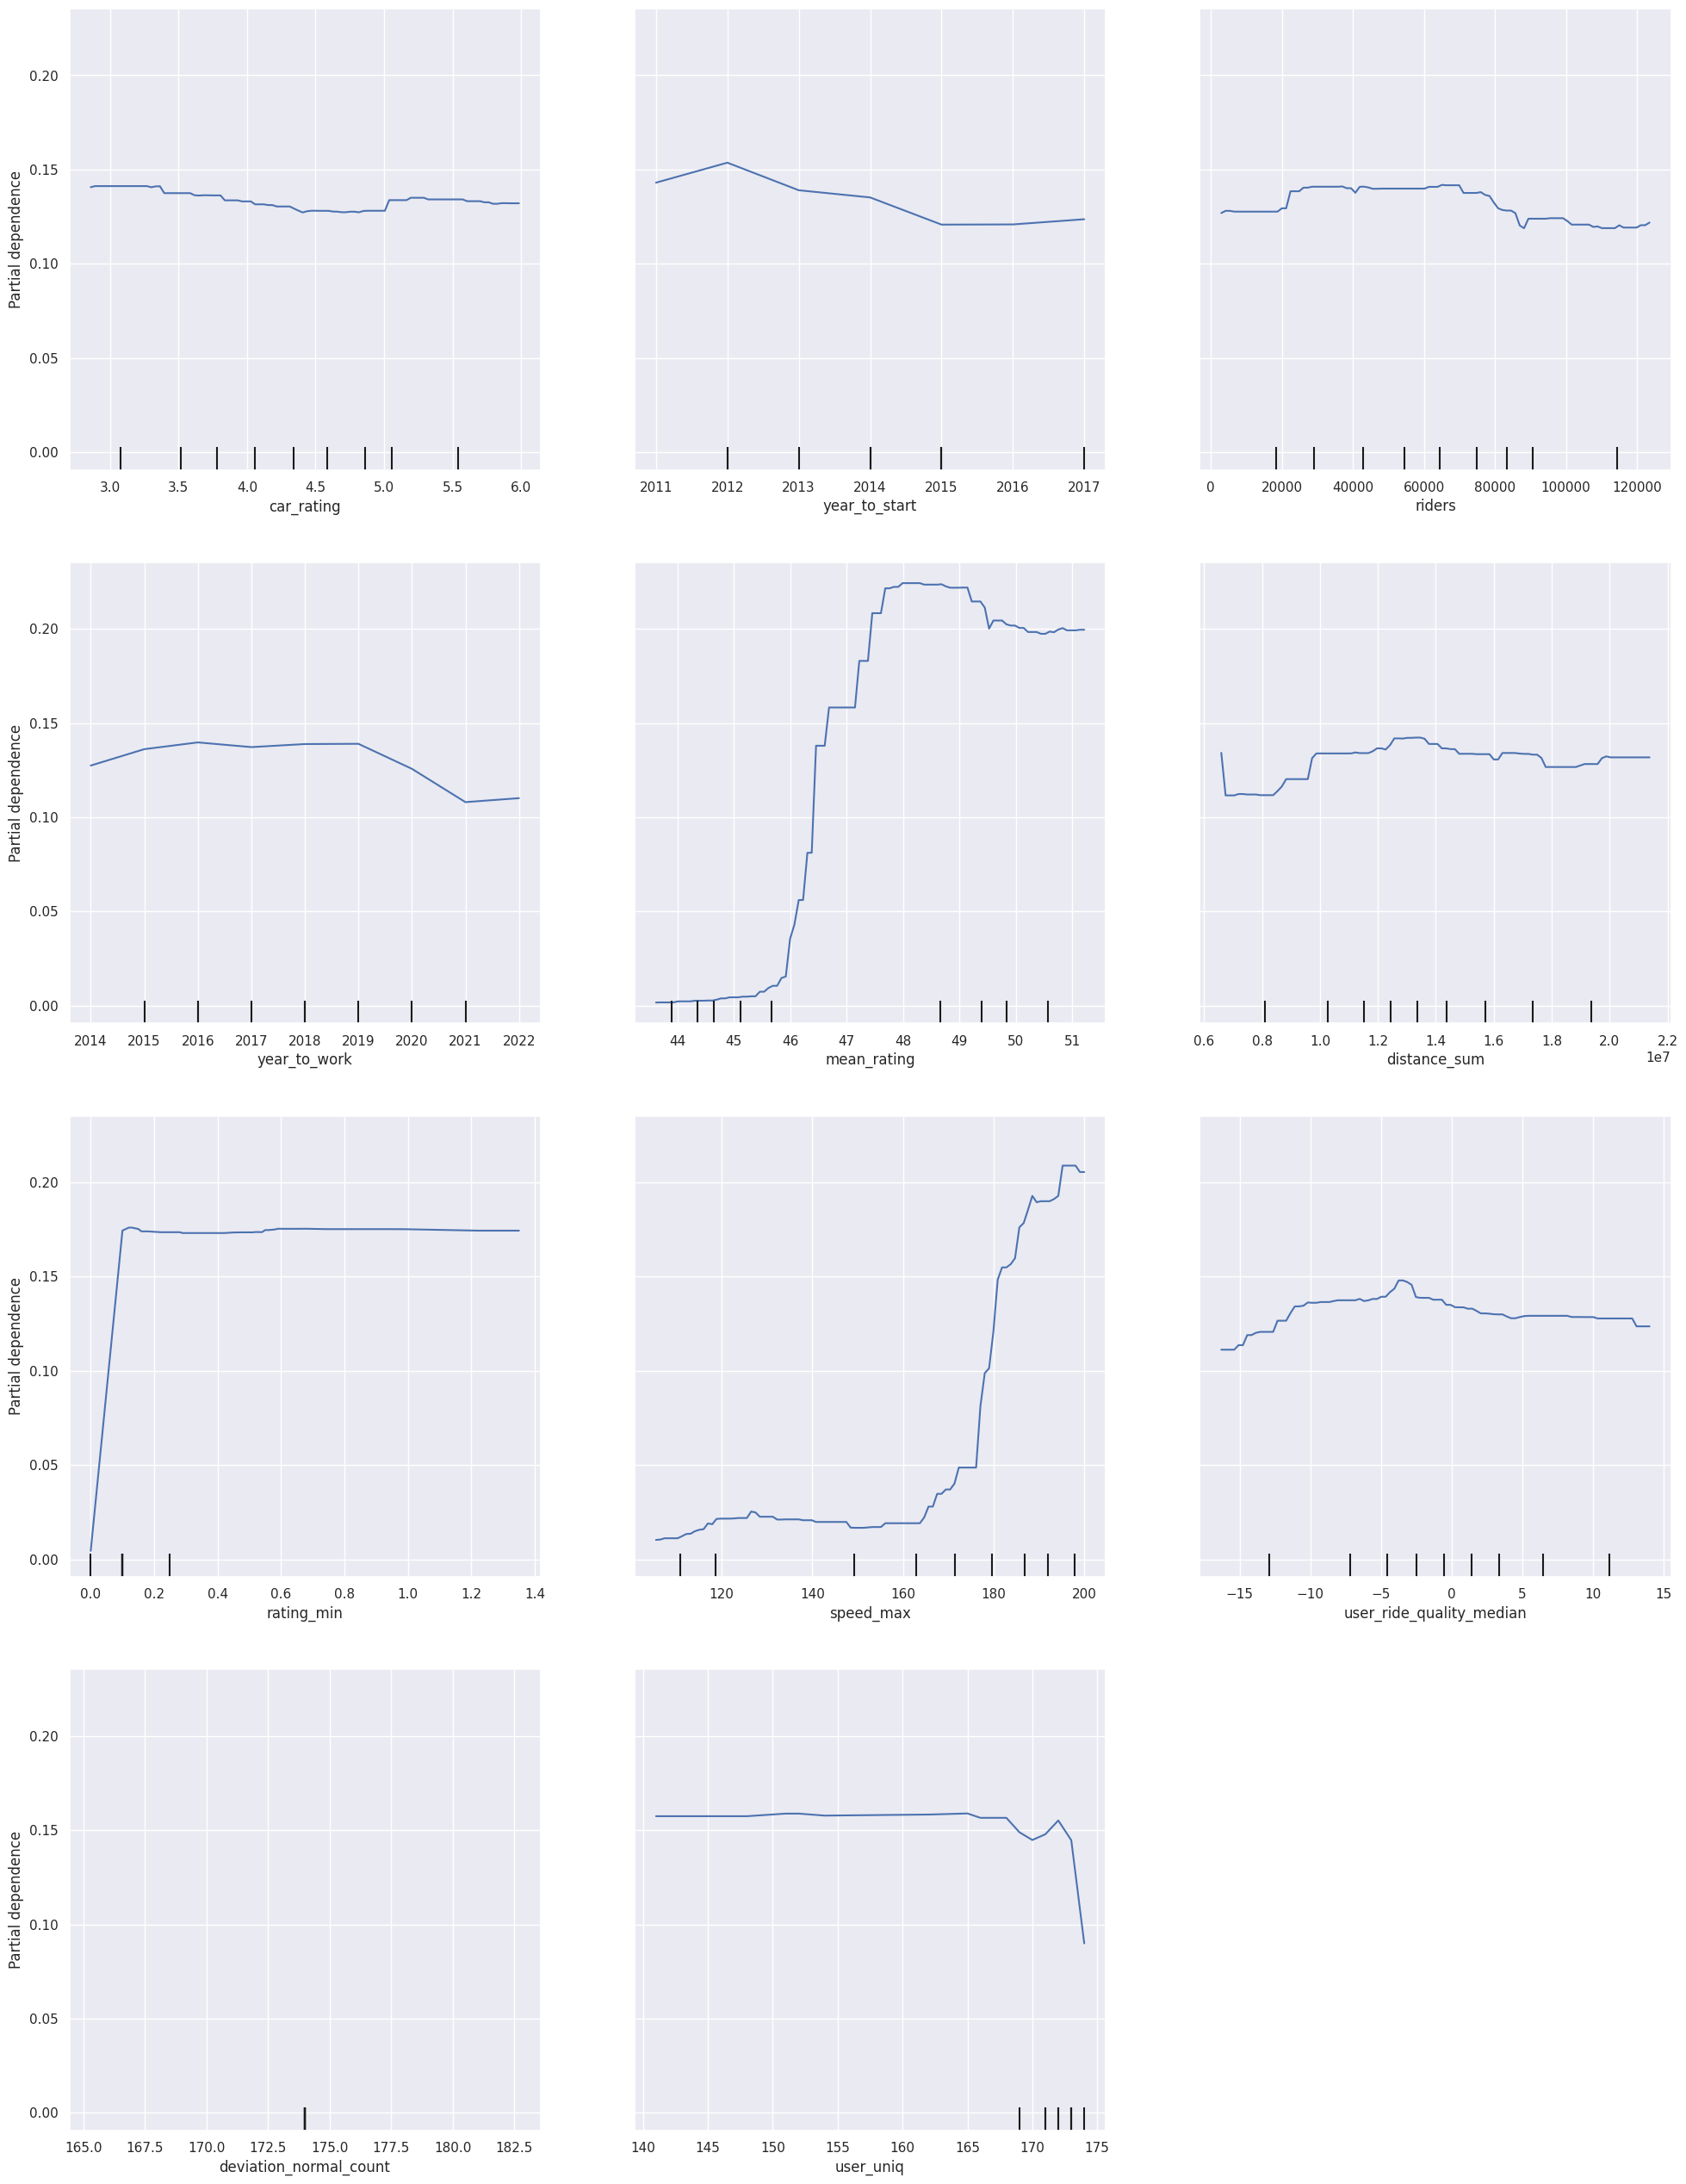

In [23]:
from sklearn.inspection import PartialDependenceDisplay

plt.rcParams['figure.figsize']=(24,32)
features = X.drop(cat_cols, axis=1).columns
PartialDependenceDisplay.from_estimator(clf, X_test, features, target='engine_overheat', n_cols=3,
    n_jobs=-1,
    random_state=42)

## –†–µ–≥—Ä–µ—Å—Å–∏—è üìà

In [78]:
X = rides_info.drop(drop_cols + ['target_reg','target_class'], axis=1)
y = rides_info['target_reg']

NameError: name 'rides_info' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regr = CatBoostRegressor(random_seed=9,
                        thread_count=-1,
                        use_best_model=True,
                        cat_features=cat_cols,
                         )

In [ ]:
regr.fit( X_train, y_train, 
        eval_set=(X_test, y_test),
        verbose=50, plot=False, early_stopping_rounds=200)

print(regr.get_best_score())

# Feature Importance

# Diff Targets
# –ì—Ä–∞—Ñ–∏–∫ (pred - True) VS (True + pred) (–î—å—è–Ω–æ–∫–æ–≤)

# –ú–∞—Ç—Ä–∏—Ü–∞ —Å–º–µ–∂–Ω–æ—Å—Ç–∏ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–†–∞–∑–±–∏–≤–∞–µ–º –Ω–∞ –±–∏–Ω—ã)
# –í–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –æ—à–∏–±–æ–∫
# –®–∏—Ñ—Ç–æ–≤–∞–Ω–Ω—ã–µ —Ñ–∏—á–∏, –≤–∞–∂–Ω—ã–µ –¥–ª—è –º–æ–¥–µ–ª–∏
# Object Importance –∏–ª–∏ –æ—á–µ–Ω—å –±–æ–ª—å—à–∏–µ –æ—à–∏–±–∫–∏